# Laboratorio 05

Preprocesando los datos y aplicando Redes neuronales para predecir que tipo de ropa es.

60000 -> Datos de entrenamiento
10000 -> Datos para el testeo

Las 10 clases son las siguientes:

0 => Camiseta/top

1 => Pantalón

2 => Jersey

3 => Vestido

4 => Abrigo

5 => Sandalia

6 => Camisa

7 => Zapatilla

8 => Bolso

9 => Botín

Cada imagen tiene 28 píxeles de alto y 28 píxeles de ancho, para un total de 784 píxeles. Cada píxel tiene un único valor de píxel asociado, que indica la claridad u oscuridad de ese píxel; los números más altos significan más oscuro. Este valor de píxel es un número entero entre 0 y 255.

##1 Aplicar el codigo de redes neuronales en clase y comentar los resultados obtenidos, ademas de las mejores configuraciones de parametros e hiperparametros optimos

##Preprocesamiento

In [ ]:
import pandas as pd
import sklearn as skl

# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot as plt

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [ ]:
# Crea tu primer MLP en Keras
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


In [ ]:
#Acceso a drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = "/content/drive/MyDrive/420/dataset labs/lab05/fashion-mnist_test.csv"
url2="/content/drive/MyDrive/420/dataset labs/lab05/fashion-mnist_train.csv"
dataframetest = pd.read_csv(url)
dataframetrain = pd.read_csv(url2)
print(dataframetest)

      label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0         0       0       0       0       0       0       0       0       9   
1         1       0       0       0       0       0       0       0       0   
2         2       0       0       0       0       0       0      14      53   
3         2       0       0       0       0       0       0       0       0   
4         3       0       0       0       0       0       0       0       0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
9995      0       0       0       0       0       0       0       0       0   
9996      6       0       0       0       0       0       0       0       0   
9997      8       0       0       0       0       0       0       0       0   
9998      8       0       1       3       0       0       0       0       0   
9999      1       0       0       0       0       0       0       0     140   

      pixel9  ...  pixel775  pixel776  pixel777  pi

In [ ]:
print(dataframetrain)

       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          2       0       0       0       0       0       0       0       0   
1          9       0       0       0       0       0       0       0       0   
2          6       0       0       0       0       0       0       0       5   
3          0       0       0       0       1       2       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776 

In [ ]:
print(dataframetrain.describe())

              label        pixel1        pixel2        pixel3        pixel4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       4.500000      0.000900      0.006150      0.035333      0.101933   
std        2.872305      0.094689      0.271011      1.222324      2.452871   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000     16.000000     36.000000    226.000000    164.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.247967      0.411467      0.805767      2.198283      5.682000   
std        4.306912      5.836188      8.215169    

In [ ]:
print(dataframetest.describe())

              label        pixel1        pixel2        pixel3        pixel4  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       4.500000      0.000400      0.010300      0.052100      0.077000   
std        2.872425      0.024493      0.525187      2.494315      2.208882   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000      2.000000     45.000000    218.000000    185.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.208600      0.349200      0.826700      2.321200      5.457800   
std        4.669183      5.657849      8.591731    

Se interpreta que el dataset está correctamente

In [ ]:
datasettrain=dataframetrain.values
datasettest=dataframetest.values

X_train, y_train = datasettrain[:,1:], datasettrain[:,0]
X_test, y_test = datasettest[:, 1:], datasettest[:,0]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_train.shape)
print(X_train)

(60000, 784)
(60000,)
(10000, 784)
(60000,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


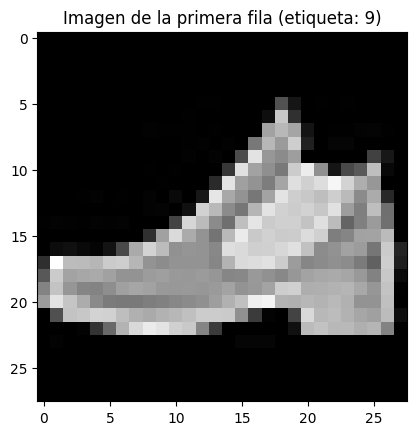

In [ ]:
# Tomar la primera fila como imagen y remodelarla a 28x28
imagen = X_train[1].reshape(28, 28)

# Mostrar la imagen
plt.imshow(imagen, cmap='gray')
plt.title(f"Imagen de la primera fila (etiqueta: {y_train[1]})")
plt.show()

In [ ]:
# Configurando parametros necesario
input_layer_size  = 784  # Entrada de 28 x 28 caracteristicas
hidden_layer_size = 10   # 10 unidades ocultas
num_labels = 10          # 10 etiquetas, de 0 a 9


pesos = {}
pesos['Theta1'] = np.random.rand(10, 785)
pesos['Theta2'] = np.random.rand(10, 11)

Theta1, Theta2 = pesos['Theta1'], pesos['Theta2']

print(Theta1.ravel().shape)
print(Theta2.ravel().shape)

nn_params = np.concatenate([Theta1.ravel(), Theta2.ravel()])
print(nn_params.shape)


(7850,)
(110,)
(7960,)


In [ ]:
def sigmoid(z):
    """
    Computes the sigmoid of z.
    """
    return 1.0 / (1.0 + np.exp(-z))


def sigmoidGradient(z):

    g = np.zeros(z.shape)

    g = sigmoid(z) * (1 - sigmoid(z))

    return g

In [ ]:
def nnCostFunction(nn_params,
                   input_layer_size,
                   hidden_layer_size,
                   num_labels,
                   X, y, lambda_= 0.0):

    # Reshape nn_params back into the parameters Theta1 and Theta2, the weight matrices
    # for our 2 layer neural network
    Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                        (hidden_layer_size, (input_layer_size + 1)))

    Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                        (num_labels, (hidden_layer_size + 1)))

    m = y.size

    J = 0
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)

    a1 = np.concatenate([np.ones((m, 1)), X], axis=1)

    a2 = sigmoid(a1.dot(Theta1.T))
    a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis=1)

    a3 = sigmoid(a2.dot(Theta2.T))

    # print("-"*20)
    # print(y.shape)
    # print(y.reshape(-1))
    # print("-"*20)
    y_matrix = y.reshape(-1)
    # print(y.shape)
    y_matrix = np.eye(num_labels)[y_matrix]
    # print(y_matrix)

    temp1 = Theta1
    temp2 = Theta2

    # Agregar el termino de regularización

    reg_term = (lambda_ / (2 * m)) * (np.sum(np.square(temp1[:, 1:])) + np.sum(np.square(temp2[:, 1:])))

    J = (-1 / m) * np.sum((np.log(a3) * y_matrix) + np.log(1 - a3) * (1 - y_matrix)) + reg_term

    # Backpropogation

    delta_3 = a3 - y_matrix
    delta_2 = delta_3.dot(Theta2)[:, 1:] * sigmoidGradient(a1.dot(Theta1.T))

    Delta1 = delta_2.T.dot(a1)
    Delta2 = delta_3.T.dot(a2)

    # Agregar regularización al gradiente

    Theta1_grad = (1 / m) * Delta1
    Theta1_grad[:, 1:] = Theta1_grad[:, 1:] + (lambda_ / m) * Theta1[:, 1:]

    Theta2_grad = (1 / m) * Delta2
    Theta2_grad[:, 1:] = Theta2_grad[:, 1:] + (lambda_ / m) * Theta2[:, 1:]

    # ===================== Alterntate solutions =====================
    # my_final_matrix = np.zeros(a3.shape)
    # for c in np.arange(num_labels):
    #    my_final_matrix[:, c] = (np.log(a3[:, c]) * (y == c)) + (np.log(1 - a3[:, c]) * (1 - (y == c)))
    #J = (-1 / m) * np.sum(my_final_matrix)
    # ================================================================

    # ================================================================
    # Unroll gradients
    # grad = np.concatenate([Theta1_grad.ravel(order=order), Theta2_grad.ravel(order=order)])

    grad = np.concatenate([Theta1_grad.ravel(), Theta2_grad.ravel()])

    return J, grad

In [ ]:
lambda_ = 0.1
J, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X_train, y_train, lambda_)

In [ ]:
z = np.array([-1, -0.5, 0, 0.5, 1])
g = sigmoidGradient(z)
print('Gradiente sigmoide evaluada con [-1 -0.5 0 0.5 1]:\n  ')
print(g)

Gradiente sigmoide evaluada con [-1 -0.5 0 0.5 1]:
  
[0.19661193 0.23500371 0.25       0.23500371 0.19661193]


In [ ]:
def randInitializeWeights(L_in, L_out, epsilon_init=0.12):
    """
    Randomly initialize the weights of a layer in a neural network.

    Parameters
    ----------
    L_in : int
        Number of incomming connections.

    L_out : int
        Number of outgoing connections.

    epsilon_init : float, optional
        Range of values which the weight can take from a uniform
        distribution.

    Returns
    -------
    W : array_like
        The weight initialiatized to random values.  Note that W should
        be set to a matrix of size(L_out, 1 + L_in) as
        the first column of W handles the "bias" terms."""


    W = np.zeros((L_out, 1 + L_in))
    W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init

    return W

In [ ]:
print('Inicialización de parámetros de redes neuronales...')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

# Desenrrollr parametros
initial_nn_params = np.concatenate([initial_Theta1.ravel(), initial_Theta2.ravel()], axis=0)

Inicialización de parámetros de redes neuronales...


In [ ]:
#  After you have completed the assignment, change the maxiter to a larger
#  value to see how more training helps.
options= {'maxiter': 1000}

#  You should also try different values of lambda
lambda_ = 1

# Create "short hand" for the cost function to be minimized
costFunction = lambda p: nnCostFunction(p, input_layer_size,
                                        hidden_layer_size,
                                        num_labels, X_train, y_train, lambda_)

# Now, costFunction is a function that takes in only one argument
# (the neural network parameters)
res = optimize.minimize(costFunction,
                        initial_nn_params,
                        jac=True,
                        method='TNC',
                        options=options)

# get the solution of the optimization
nn_params = res.x

# Obtain Theta1 and Theta2 back from nn_params
Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                    (hidden_layer_size, (input_layer_size + 1)))

Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                    (num_labels, (hidden_layer_size + 1)))

<ipython-input-17-537c46ec785b>:15: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,
<ipython-input-11-fcf1f7fde265>:5: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))
<ipython-input-12-de0ba5c46d6a>:44: RuntimeWarning: divide by zero encountered in log
  J = (-1 / m) * np.sum((np.log(a3) * y_matrix) + np.log(1 - a3) * (1 - y_matrix)) + reg_term
<ipython-input-12-de0ba5c46d6a>:44: RuntimeWarning: invalid value encountered in multiply
  J = (-1 / m) * np.sum((np.log(a3) * y_matrix) + np.log(1 - a3) * (1 - y_matrix)) + reg_term


In [ ]:
def predict(Theta1, Theta2, X):
    """
    Predict the label of an input given a trained neural network
    Outputs the predicted label of X given the trained weights of a neural
    network(Theta1, Theta2)
    """
    # Useful values
    m = X.shape[0]
    num_labels = Theta2.shape[0]

    # You need to return the following variables correctly
    p = np.zeros(m)
    h1 = sigmoid(np.dot(np.concatenate([np.ones((m, 1)), X], axis=1), Theta1.T))
    h2 = sigmoid(np.dot(np.concatenate([np.ones((m, 1)), h1], axis=1), Theta2.T))
    p = np.argmax(h2, axis=1)
    return p

In [ ]:
pred = predict(Theta1, Theta2, X_train[:,:])
print(pred)
print('Training Set Accuracy: %f' % (np.mean(pred == y_train[:]) * 100))

[8 9 4 ... 8 8 7]
Training Set Accuracy: 64.148333


<ipython-input-11-fcf1f7fde265>:5: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


In [ ]:
pred = predict(Theta1, Theta2, X_test[:,:])
print(pred)
print('Training Set Accuracy: %f' % (np.mean(pred == y_test[:]) * 100))


[3 1 2 ... 8 8 4]
Training Set Accuracy: 63.480000


<ipython-input-11-fcf1f7fde265>:5: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


##PRUEBAS

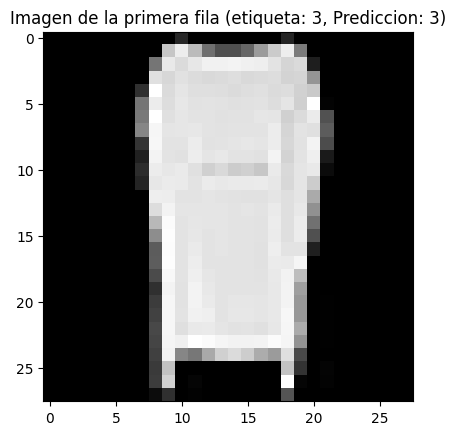

In [ ]:
# Tomar la primera fila como imagen y remodelarla a 28x28
imagen = X_test[101].reshape(28, 28)

# Mostrar la imagen
plt.imshow(imagen, cmap='gray')
plt.title(f"Imagen de la primera fila (etiqueta: {y_test[101]}, Prediccion: {pred[101]})")
plt.show()


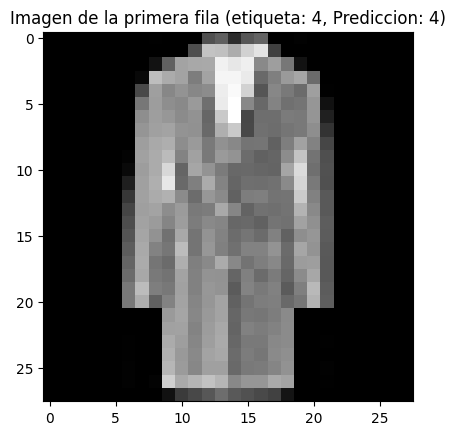

In [ ]:
# Tomar la primera fila como imagen y remodelarla a 28x28
imagen = X_test[5500].reshape(28, 28)

# Mostrar la imagen
plt.imshow(imagen, cmap='gray')
plt.title(f"Imagen de la primera fila (etiqueta: {y_test[5500]}, Prediccion: {pred[5500]})")
plt.show()

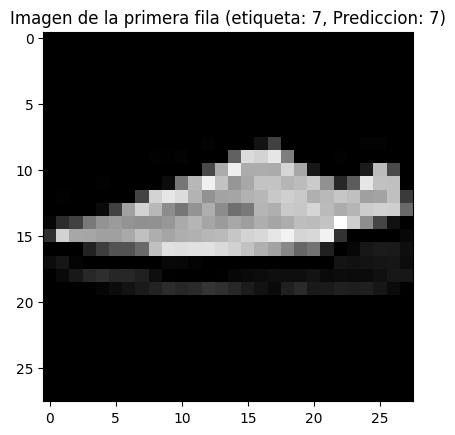

In [ ]:
# Tomar la primera fila como imagen y remodelarla a 28x28
imagen = X_test[8000].reshape(28, 28)

# Mostrar la imagen
plt.imshow(imagen, cmap='gray')
plt.title(f"Imagen de la primera fila (etiqueta: {y_test[8000]}, Prediccion: {pred[8000]})")
plt.show()

##INTERPRETACION
El porcentaje de acierto de entrenamiento es 64% y de test es 63% , se probo mas ajustes pero redujo la probabilidad y otras simplemente no renderizó(teniendo en cuenta que demora demasiado).

## 2 Aplicar el codigo de redes neuronales basado en pytorch y comentar los resultados objtenidos, ademas de las mejores configuraciones de parametros e hiperparametros optimos.

In [ ]:
# utilizado para la manipulación de directorios y rutas
import os
# Cálculo científico y vectorial para python
import numpy as np
# Libreria para graficos
from matplotlib import pyplot as plt


import torch
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch import nn  # All neural network modules
from torch.utils.data import DataLoader  # Gives easier dataset managment by creating mini batches etc.

import torchvision # torch package for vision related things
import torchvision.transforms as transforms  # Transformations we can perform on our dataset for augmentation
import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
import torchvision.datasets as datasets  # Standard datasets
from tqdm import tqdm  # For nice progress bar!

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [ ]:
# Here we create our simple neural network. For more details here we are subclassing and
# inheriting from nn.Module, this is the most general way to create your networks and
# allows for more flexibility. I encourage you to also check out nn.Sequential which
# would be easier to use in this scenario but I wanted to show you something that
# "always" works.
class RedNeuronalMLS(nn.Module):
    def __init__(self, input_size, num_classes):
        super(RedNeuronalMLS, self).__init__()
        # Our first linear layer take input_size, in this case 784 nodes to 50
        # and our second linear layer takes 50 to the num_classes we have, in
        # this case 10.
        self.fc1 = nn.Linear(input_size, 50)
        self.fc2 = nn.Linear(50, num_classes)

    def forward(self, x):
        """
        x here is the mnist images and we run it through fc1, fc2 that we created above.
        we also add a ReLU activation function in between and for that (since it has no parameters)
        I recommend using nn.functional (F)
        """
        x = self.fc1(x)
        x = F.sigmoid(x)
        # x = F.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
# Set device cuda for GPU if it's available otherwise run on the CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Hyperparameters of our neural network which depends on the dataset, and
# also just experimenting to see what works well (learning rate for example).
input_size = 784
num_classes = 10
learning_rate = 0.001
batch_size = 10000
num_epochs = 3

cuda


In [ ]:
# Load Training and Test data
train_dataset = datasets.MNIST(root="dataset/", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root="dataset/", train=False, transform=transforms.ToTensor(), download=True)
print(len(train_dataset))
print(len(test_dataset))

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 39246064.84it/s]


Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1182596.20it/s]


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9405677.76it/s]


Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5544391.38it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw

60000
10000


In [ ]:
# Initialize network
model = RedNeuronalMLS(input_size=input_size, num_classes=num_classes).to(device)

In [ ]:
model

RedNeuronalMLS(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Train Network
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):
    # for batch_idx, (data, targets) in enumerate(train_loader):

        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)

        # print(data.shape)
        # Get to correct shape
        data = data.reshape(data.shape[0], -1)
        print(data.shape)
        # print("-"*30)
        # forward
        scores = model(data)
        loss = criterion(scores, targets)

        # backward
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()

  0%|          | 0/6 [00:00<?, ?it/s]

torch.Size([10000, 784])


 33%|███▎      | 2/6 [00:07<00:14,  3.67s/it]

torch.Size([10000, 784])


 50%|█████     | 3/6 [00:10<00:10,  3.43s/it]

torch.Size([10000, 784])


 67%|██████▋   | 4/6 [00:12<00:05,  2.61s/it]

torch.Size([10000, 784])


 83%|████████▎ | 5/6 [00:13<00:02,  2.20s/it]

torch.Size([10000, 784])


100%|██████████| 6/6 [00:14<00:00,  2.45s/it]


torch.Size([10000, 784])


 17%|█▋        | 1/6 [00:01<00:05,  1.16s/it]

torch.Size([10000, 784])


 33%|███▎      | 2/6 [00:02<00:04,  1.06s/it]

torch.Size([10000, 784])


 50%|█████     | 3/6 [00:03<00:03,  1.05s/it]

torch.Size([10000, 784])


 67%|██████▋   | 4/6 [00:04<00:02,  1.04s/it]

torch.Size([10000, 784])


 83%|████████▎ | 5/6 [00:05<00:01,  1.11s/it]

torch.Size([10000, 784])


100%|██████████| 6/6 [00:06<00:00,  1.08s/it]


torch.Size([10000, 784])


 17%|█▋        | 1/6 [00:01<00:05,  1.05s/it]

torch.Size([10000, 784])


 33%|███▎      | 2/6 [00:02<00:04,  1.04s/it]

torch.Size([10000, 784])


 50%|█████     | 3/6 [00:03<00:03,  1.27s/it]

torch.Size([10000, 784])


 67%|██████▋   | 4/6 [00:04<00:02,  1.29s/it]

torch.Size([10000, 784])


 83%|████████▎ | 5/6 [00:05<00:01,  1.19s/it]

torch.Size([10000, 784])


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]

torch.Size([10000, 784])


In [ ]:
# Check accuracy on training & test to see how good our model
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()

    predicciones = []
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            x = x.reshape(x.shape[0], -1)

            scores = model(x)
            _, predictions = scores.max(1)
            predicciones.append(predictions)

            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

    model.train()
    return num_correct/num_samples, predicciones

p_train, pred_train  = check_accuracy(train_loader, model)
p_test, pred_test  = check_accuracy(test_loader, model)

print(f"Accuracy on training set: {p_train*100:.2f}")
print(f"Accuracy on test set: {p_test*100:.2f}")

Accuracy on training set: 68.07
Accuracy on test set: 69.06


##INTERPRETACION

De entrenamiento se obtiene un acierto de 68% y de test 69% lo cual un poco mas que en la 1